In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
nu_data = pd.read_pickle("./input/Jun2020/after_training.pckl")['nu']


In [12]:
nu_data['mc']['mc_E'][nu_data['mc']['mc_pdg']==111].max().clip(0,3)

array([0.        , 0.        , 0.        , ..., 0.3863498 , 0.48812795,
       0.18150464], dtype=float32)

In [55]:
lee = nu_data['daughters'].query('leeweight>0.0001')
del nu_data['daughters']

query = 'reco_e>0.65 &\
         n_showers_contained>0 &\
         shr_energy_y_v>70 &\
         trk_score_v<0.3 &\
         optical_filter'

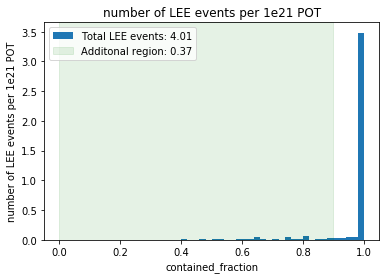

In [56]:
all_lee = lee.query(query).query('contained_fraction<=1')\
                            .eval('event_scale*leeweight')\
                            .sum()
added_lee = lee.query(query).query('contained_fraction<=0.9')\
                            .eval('event_scale*leeweight')\
                            .sum()
fig, ax = plt.subplots()

ax.hist(lee.query(query).eval('contained_fraction'), 
        bins=50, 
        range=(0,1), 
        label = 'Total LEE events: {:.2f}'.format(all_lee), 
        weights=lee.query(query).eval('event_scale*leeweight'))
ax.axvspan(0.0,0.9,
           label='Additonal region: {:.2f}'.format(added_lee), 
           alpha=0.1, color='g')
ax.legend()
ax.set_title('number of LEE events per 1e21 POT')
ax.set_xlabel('contained_fraction')
ax.set_ylabel('number of LEE events per 1e21 POT')
fig.savefig('contained_fraction_relax.pdf')